In [154]:
# Fish market regression problem

In [155]:
import pandas as pd 
import numpy as np

In [156]:
Fish_df = pd.read_csv("Fish.csv")

In [157]:
Fish_df.count()
# no null values 

Species    159
Weight     159
Length1    159
Length2    159
Length3    159
Height     159
Width      159
dtype: int64

In [158]:
Fish_df.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [159]:
target = Fish_df["Weight"].copy()

In [160]:
type(target)

pandas.core.series.Series

In [161]:
features = Fish_df.drop("Weight",axis=1)

In [162]:
features

,Species,Length1,Length2,Length3,Height,Width
0,Bream,23.2,25.4,30.0,11.5200,4.0200
1,Bream,24.0,26.3,31.2,12.4800,4.3056
2,Bream,23.9,26.5,31.1,12.3778,4.6961
3,Bream,26.3,29.0,33.5,12.7300,4.4555
4,Bream,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,13.2,14.3,15.2,2.8728,2.0672


In [163]:
from sklearn.model_selection import train_test_split

X_train , X_test ,Y_train ,Y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [164]:
type(X_train)

pandas.core.frame.DataFrame

In [165]:
type(Y_train)

pandas.core.series.Series

In [166]:
corr_matrix = Fish_df.corr(numeric_only=True)
corr_matrix["Weight"].sort_values
# a good corelation with every feature

<bound method Series.sort_values of Weight     1.000000
Length1    0.915712
Length2    0.918618
Length3    0.923044
Height     0.724345
Width      0.886507
Name: Weight, dtype: float64>

array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Length1', ylabel='Weight'>,
        <Axes: xlabel='Length2', ylabel='Weight'>,
        <Axes: xlabel='Length3', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='Width', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Length1'>,
        <Axes: xlabel='Length1', ylabel='Length1'>,
        <Axes: xlabel='Length2', ylabel='Length1'>,
        <Axes: xlabel='Length3', ylabel='Length1'>,
        <Axes: xlabel='Height', ylabel='Length1'>,
        <Axes: xlabel='Width', ylabel='Length1'>],
       [<Axes: xlabel='Weight', ylabel='Length2'>,
        <Axes: xlabel='Length1', ylabel='Length2'>,
        <Axes: xlabel='Length2', ylabel='Length2'>,
        <Axes: xlabel='Length3', ylabel='Length2'>,
        <Axes: xlabel='Height', ylabel='Length2'>,
        <Axes: xlabel='Width', ylabel='Length2'>],
       [<Axes: xlabel='Weight', ylabel='Length3'>,
        <Axes: xlabel='Lengt

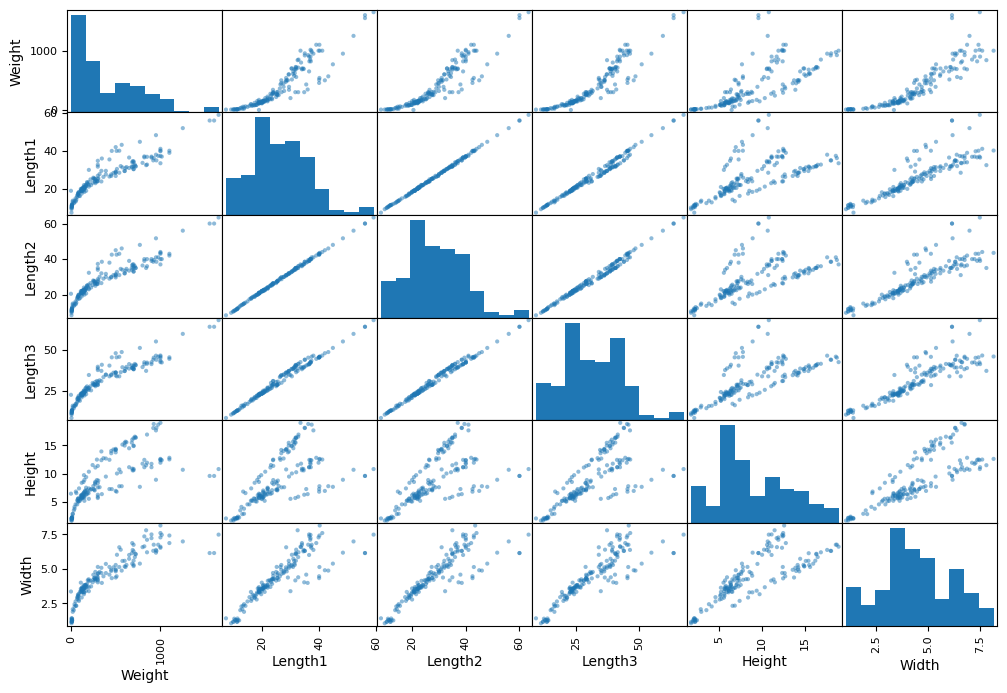

In [167]:
from pandas.plotting import scatter_matrix
scatter_matrix(Fish_df,figsize=(12,8))

In [168]:
Fish_df_num = Fish_df.select_dtypes(include=[np.number])
Fish_df_num

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [169]:
Fish_df_cat = Fish_df["Species"].copy()
Fish_df_cat

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

In [170]:
num_attribs = [ 'Length1', 'Length2', 'Length3', 'Height', 'Width']
cat_attribs = ["Species"]

In [171]:
num_attribs

['Length1', 'Length2', 'Length3', 'Height', 'Width']

In [172]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

In [173]:
num_pipline = Pipeline([
    ("num_pipeline",StandardScaler())
])

In [174]:
cat_pipeline = Pipeline([
    ("cat_pipeline",OneHotEncoder(handle_unknown="ignore"))
])

In [175]:
preprocessing = ColumnTransformer([
    ("num",num_pipline,num_attribs),
    ("cat",cat_pipeline,cat_attribs)
]) 

In [176]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_pipeline',
                                                  StandardScaler())]),
                                 ['Length1', 'Length2', 'Length3', 'Height',
                                  'Width']),
                                ('cat',
                                 Pipeline(steps=[('cat_pipeline',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Species'])])

In [177]:
from sklearn.linear_model import LinearRegression
Lr = make_pipeline(preprocessing,LinearRegression())

In [180]:
from sklearn.metrics import r2_score , mean_squared_error

In [178]:
Lr.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_pipeline',
                                                                   StandardScaler())]),
                                                  ['Length1', 'Length2',
                                                   'Length3', 'Height',
                                                   'Width']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_pipeline',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Species'])])),
                ('linearregression', LinearRegression())])

In [179]:
preds = Lr.predict(X_train)

In [190]:
acc = (r2_score(y_true=Y_train,y_pred=preds)*100)
int(acc)

92

In [193]:
print("accuracy",int(r2_score(y_true=Y_train,y_pred=preds)*100))

accuracy 92
